# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

       grad_100_value     aid_value
count     3466.000000   3466.000000
mean        28.353347   8247.699942
std         23.306899   6601.903233
min          0.000000    294.000000
25%          9.000000   4066.500000
50%         22.500000   5370.500000
75%         43.600000  10239.750000
max        100.000000  41580.000000


<ipython-input-1-d871e4a0b61d>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['grad_100_value'], shade=True, ax=axes[1], color='darkblue')


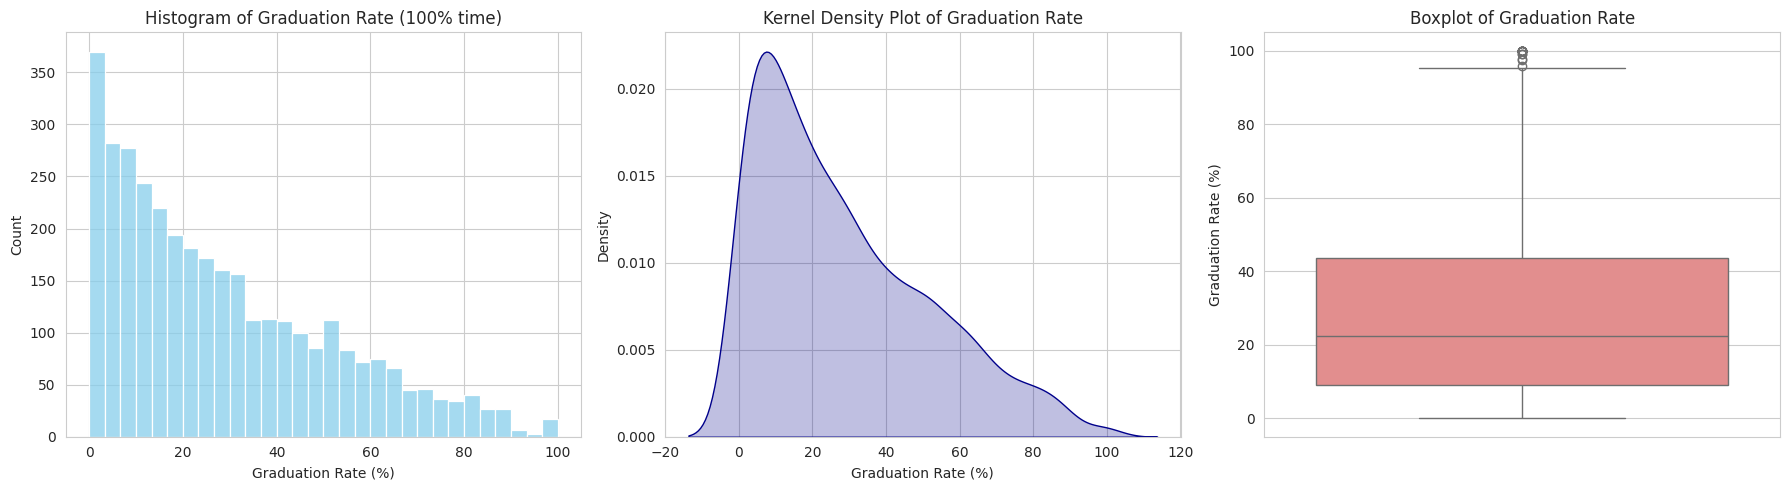

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from local or Google Drive
df = pd.read_csv("/content/college_completion.csv")

# Convert relevant columns to numeric, coercing errors to NaN
df['grad_100_value'] = pd.to_numeric(df['grad_100_value'], errors='coerce')
df['aid_value'] = pd.to_numeric(df['aid_value'], errors='coerce')

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['grad_100_value', 'aid_value'])

# Display summary statistics
print(df_clean[['grad_100_value', 'aid_value']].describe())

# Set plot style
sns.set_style("whitegrid")

# Create subplots for different visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(df_clean['grad_100_value'], bins=30, kde=False, ax=axes[0], color='skyblue')
axes[0].set_title("Histogram of Graduation Rate (100% time)")
axes[0].set_xlabel("Graduation Rate (%)")
axes[0].set_ylabel("Count")

# Kernel Density Plot
sns.kdeplot(df_clean['grad_100_value'], shade=True, ax=axes[1], color='darkblue')
axes[1].set_title("Kernel Density Plot of Graduation Rate")
axes[1].set_xlabel("Graduation Rate (%)")

# Boxplot
sns.boxplot(y=df_clean['grad_100_value'], ax=axes[2], color='lightcoral')
axes[2].set_title("Boxplot of Graduation Rate")
axes[2].set_ylabel("Graduation Rate (%)")

plt.tight_layout()
plt.show()


Looking at the data, some clear trends emerge regarding college completion rates and financial aid. Public institutions overwhelmingly dominate the 2-year college category, whereas private not-for-profit institutions are mostly 4-year schools. Private for-profit colleges are more evenly split between the two levels. When it comes to graduation rates, the distribution is skewed to the right—meaning while some schools have high on-time graduation rates, a significant number fall on the lower end. The boxplot makes it clear that private not-for-profit 4-year institutions tend to have the highest median graduation rates, while public and for-profit institutions generally lag behind. The density plots reinforce this pattern, showing that private not-for-profit colleges consistently outperform the other categories in terms of on-time degree completion.

Financial aid plays an important role in these differences. The distribution of aid_value shows that private not-for-profit institutions typically receive the most aid, while public and for-profit institutions receive less. The shape of the aid distribution suggests that financial support isn’t spread evenly across institution types, which likely contributes to disparities in graduation outcomes. When we plot graduation rates against aid, a positive correlation emerges—especially for private not-for-profit schools, where more aid seems to be linked to better graduation rates. Public institutions, despite receiving less aid on average, show a wider range of graduation outcomes, while for-profit colleges cluster at the lower end of both aid and completion rates. Ultimately, institutions with higher financial aid, particularly private not-for-profits, tend to see better on-time graduation rates, reinforcing the idea that financial support is a key factor in student success.

*I used StackOverflow, class notes, and OpenAI to complete this assignment

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.